In [36]:
from bs4 import BeautifulSoup
import re
import unicodedata
import pandas as pd
import numpy as np
import html5lib
import requests
from openpyxl import Workbook
from datetime import datetime
import webbrowser
import os

In [37]:
path = '../GBDC_Investment.xlsx'
xls = pd.ExcelFile(path)
all_sheets = pd.read_excel(path, sheet_name=None)

In [38]:
dataframes = {}
# Loop through each sheet and create a DataFrame in the dictionary
for sheet_name, sheet_df in all_sheets.items():
    dataframes[sheet_name.replace(' ', '_')] = sheet_df
    print(f"DataFrame name: {sheet_name} : {sheet_df.shape}")

DataFrame name: March 31 2013 : (424, 31)
DataFrame name: June 30 2013 : (431, 31)
DataFrame name: September 30 2013 : (486, 41)
DataFrame name: December 31 2013 : (442, 31)
DataFrame name: March 31 2014 : (467, 31)
DataFrame name: June 30 2014 : (189, 27)
DataFrame name: September 30 2014 : (527, 33)
DataFrame name: December 31 2014 : (506, 31)
DataFrame name: March 31 2015 : (524, 31)
DataFrame name: June 30 2015 : (571, 31)
DataFrame name: September 30 2015 : (584, 33)
DataFrame name: December 31 2015 : (63, 27)
DataFrame name: March 31 2016 : (589, 27)
DataFrame name: June 30 2016 : (79, 27)
DataFrame name: September 30 2016 : (700, 23)
DataFrame name: December 31 2016 : (646, 23)
DataFrame name: March 31 2017 : (677, 23)
DataFrame name: June 30 2017 : (699, 23)
DataFrame name: December 31 2017 : (734, 41)
DataFrame name: March 31 2018 : (766, 25)
DataFrame name: June 30 2018 : (817, 25)
DataFrame name: September 30 2018 : (883, 24)
DataFrame name: December 31 2018 : (916, 41)
Data

In [39]:
for dataframe in dataframes:
    # print(dataframe, ':',
    #       dataframes[dataframe].loc[dataframes[dataframe].shape[0]-1][0])
    if dataframes[dataframe].shape[0]-1 < 250:
        print(
            dataframe, ':', dataframes[dataframe].shape[0]-1)

June_30_2014 : 188
December_31_2015 : 62
June_30_2016 : 78


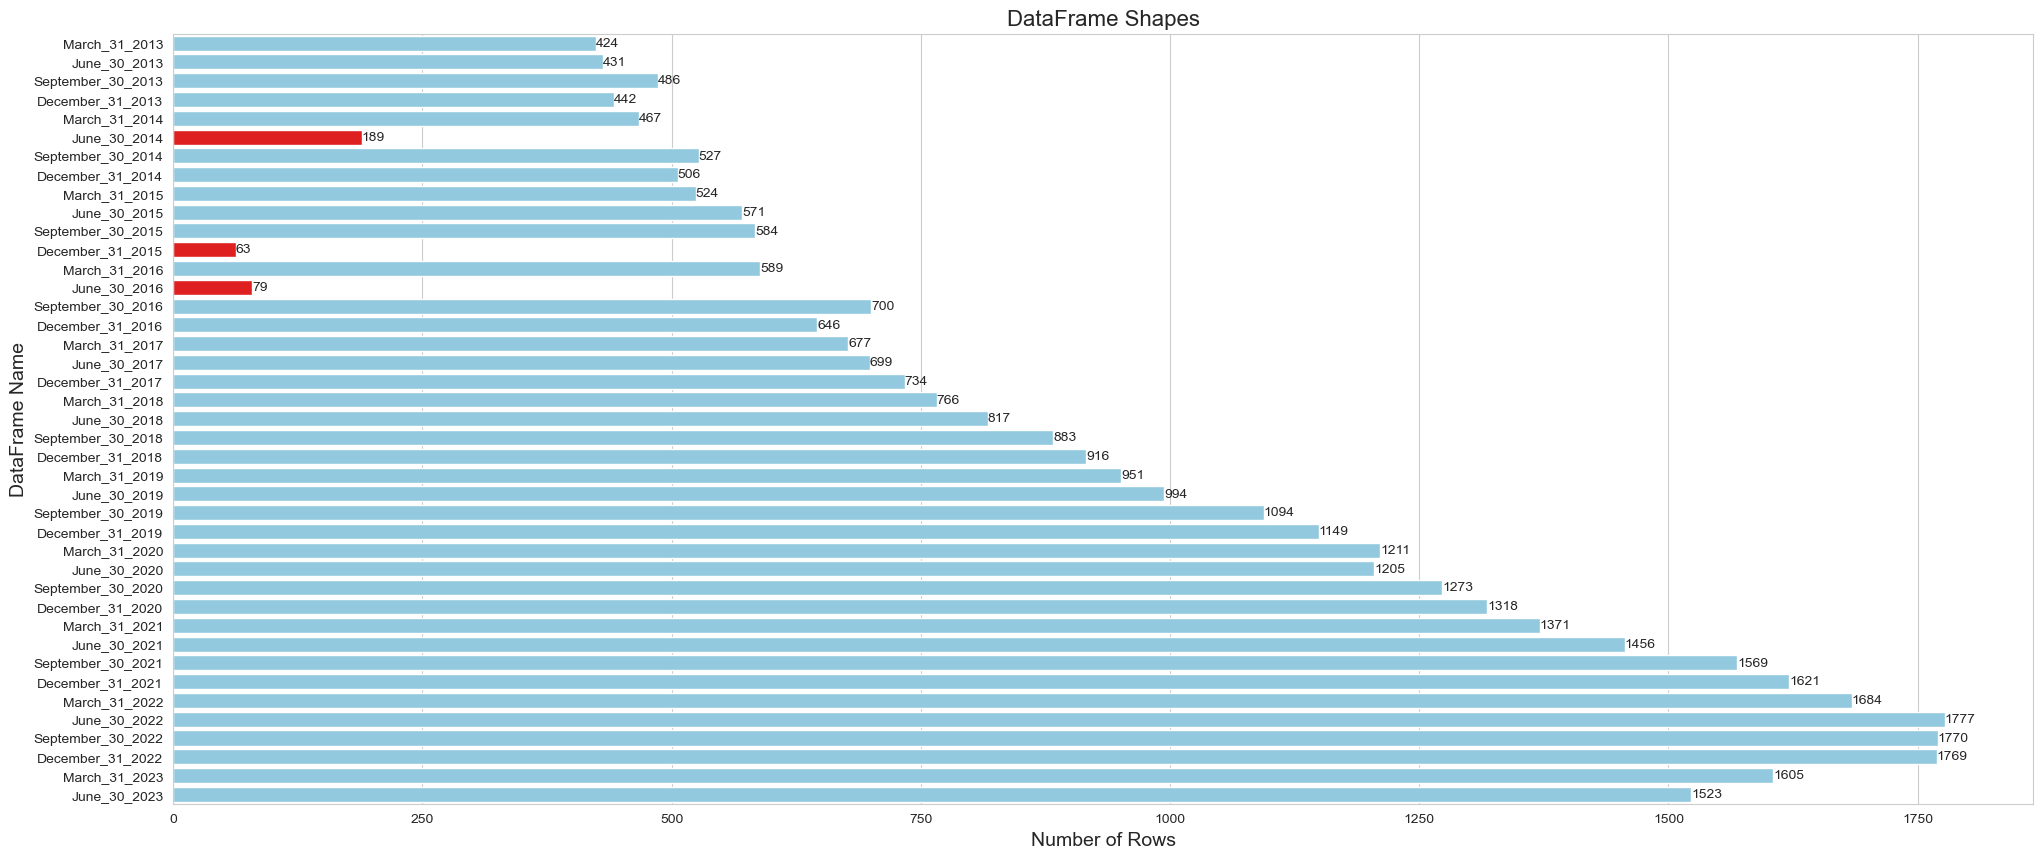

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

dataframes = {}
# Loop through each sheet and create a DataFrame in the dictionary
for sheet_name, sheet_df in all_sheets.items():
    dataframes[sheet_name.replace(' ', '_')] = sheet_df

# Extract DataFrame names and shapes
df_names = []
df_shapes = []
for sheet_name, sheet_df in dataframes.items():
    df_names.append(sheet_name)
    df_shapes.append(sheet_df.shape)

# Create a bar graph with Seaborn
plt.figure(figsize=(24, 10))
sns.set_style("whitegrid")

# Create a Seaborn barplot
sns.barplot(x=[shape[0] for shape in df_shapes], y=df_names, palette=[
    'red' if shape[0] < 250 else 'skyblue' for shape in df_shapes])

# Customize the appearance of bars
for i, shape in enumerate(df_shapes):
    width = shape[0]
    plt.text(width, i, f'{int(width)}', ha='left', va='center')

# Adjust font size
plt.xlabel('Number of Rows', fontsize=14)
plt.ylabel('DataFrame Name', fontsize=14)
plt.title('DataFrame Shapes', fontsize=16)

plt.show()

In [41]:
df = dataframes['June_30_2023']
df

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,NaN,NaN,Investment Type,NaN,Spread Above Index (1),NaN,Interest Rate (2),NaN,Maturity Date,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Investments,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Non-controlled/non-affiliate company investments,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Debt investments,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Aerospace and Defense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518,Opening Day Borrower 111 LLC,NaN,-,NaN,NaN,24854,NaN,NaN,( 615 ),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1519,"Rubio's Restaurants, Inc",NaN,13174,NaN,NaN,3463,NaN,NaN,"( 1,109 )",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1520,"Sloan Company, Inc.",NaN,6318,NaN,NaN,38,NaN,NaN,"( 6,329 )",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1521,Switchfly LLC,NaN,7697,NaN,NaN,176,NaN,NaN,-,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
def process_table(soi_table_df):
    print(1, 'shape:', soi_table_df.shape)
    soi_table_df = soi_table_df.replace(r'^\s*\$\s*$', np.nan, regex=True)
    print(2, 'shape:', soi_table_df.shape)
    soi_table_df = soi_table_df.dropna(how='all', axis=1)
    print(3, 'shape:', soi_table_df.shape)
    soi_table_df = soi_table_df.dropna(how='all', axis=0)
    print(4, 'shape:', soi_table_df.shape)
    soi_table_df.dropna()
    print(4, 'shape:', soi_table_df.shape)

    return soi_table_df


process_table = process_table(df)
process_table.to_csv("process_table.csv")
process_table

1 shape: (1523, 76)
2 shape: (1523, 76)
3 shape: (1523, 28)
4 shape: (1523, 28)
4 shape: (1523, 28)


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,30
0,NaN,NaN,Investment Type,NaN,Spread Above Index (1),NaN,Interest Rate (2),NaN,Maturity Date,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Investments,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Non-controlled/non-affiliate company investments,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Debt investments,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Aerospace and Defense,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1518,Opening Day Borrower 111 LLC,NaN,-,NaN,NaN,24854,NaN,NaN,( 615 ),NaN,...,NaN,24493,NaN,NaN,( 84 ),NaN,NaN,NaN,NaN,NaN
1519,"Rubio's Restaurants, Inc",NaN,13174,NaN,NaN,3463,NaN,NaN,"( 1,109 )",NaN,...,NaN,NaN,12979,NaN,NaN,1452,NaN,NaN,NaN,NaN
1520,"Sloan Company, Inc.",NaN,6318,NaN,NaN,38,NaN,NaN,"( 6,329 )",NaN,...,NaN,NaN,-,NaN,NaN,344,NaN,NaN,NaN,NaN
1521,Switchfly LLC,NaN,7697,NaN,NaN,176,NaN,NaN,-,NaN,...,NaN,NaN,7477,NaN,NaN,107,NaN,NaN,NaN,NaN
